In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as sts

In [2]:
df = pd.read_csv('./DATA/weight-height male-female - weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [5]:
female_filter = df['Gender'] == "Female"
female_df = df[female_filter]
female_df.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [9]:
low_end = 55.0
high_end = 56.0

In [11]:
data = female_df['Height']
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)
print(mean, std, min, max)

63.708773603458006 2.6960143739062117 54.26313333 73.38958587


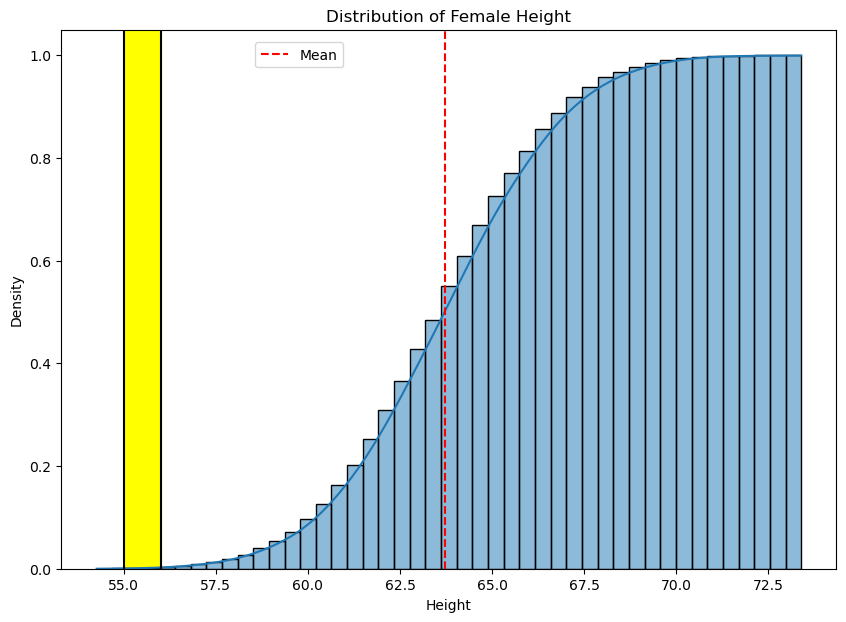

In [32]:
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(x=female_df['Height'], stat='density',kde=True, cumulative=True)
ax.set_title('Distribution of Female Height')
ax.axvline(mean, ls='--', color= 'red', label='Mean')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.legend(loc=(0.25, 0.93));

In [36]:
# lets calculate probability
proba = sts.norm.cdf(high_end, loc=mean, scale=std) - sts.norm.cdf(low_end, loc=mean, scale=std)
proba

0.0015043054289559897

In [39]:
print(f"the probability of a female having a height between 55 and 56 inches is {proba*100:,.2f}%")

the probability of a female having a height between 55 and 56 inches is 0.15%
